In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import levene, bartlett

In [8]:
df_left = pd.read_csv('data_by_section/GAIT080624-01/walk_2/joint/midfoot_left.csv')
df_right = pd.read_csv('data_by_section/GAIT080624-01/walk_2/joint/midfoot_right.csv')

In [9]:
pivot_left = df_left.pivot_table(
    values='pressure',
    index='row',
    columns='col',
    aggfunc='mean',
    fill_value=0
)

pivot_left = pivot_left.reindex(index=range(64), columns=range(16), fill_value=0)
img_avg_left = pivot_left.values

pivot_right = df_right.pivot_table(
    values='pressure',
    index='row',
    columns='col',
    aggfunc='mean',
    fill_value=0
)
pivot_right = pivot_right.reindex(index=range(64), columns=range(16), fill_value=0)
img_avg_right = pivot_right.values

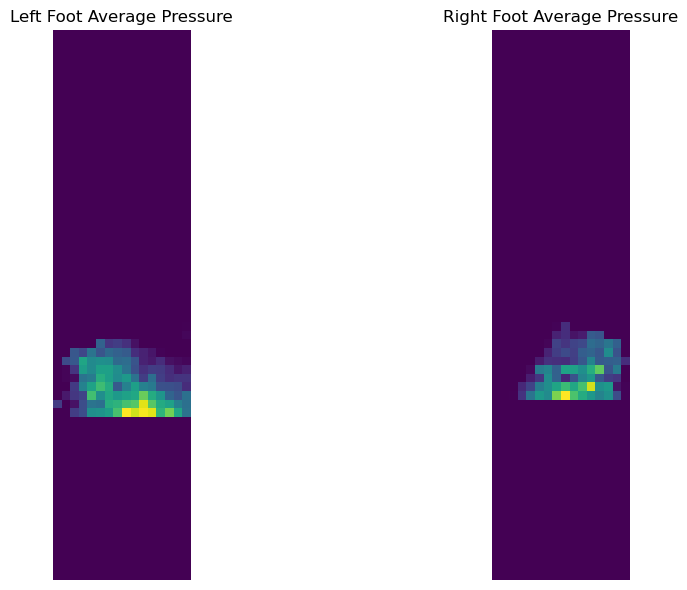

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(img_avg_left, cmap='viridis', origin='upper')
axs[0].set_title("Left Foot Average Pressure")
axs[0].axis('off')

axs[1].imshow(img_avg_right, cmap='viridis', origin='upper')
axs[1].set_title("Right Foot Average Pressure")
axs[1].axis('off')

plt.tight_layout()
plt.show()

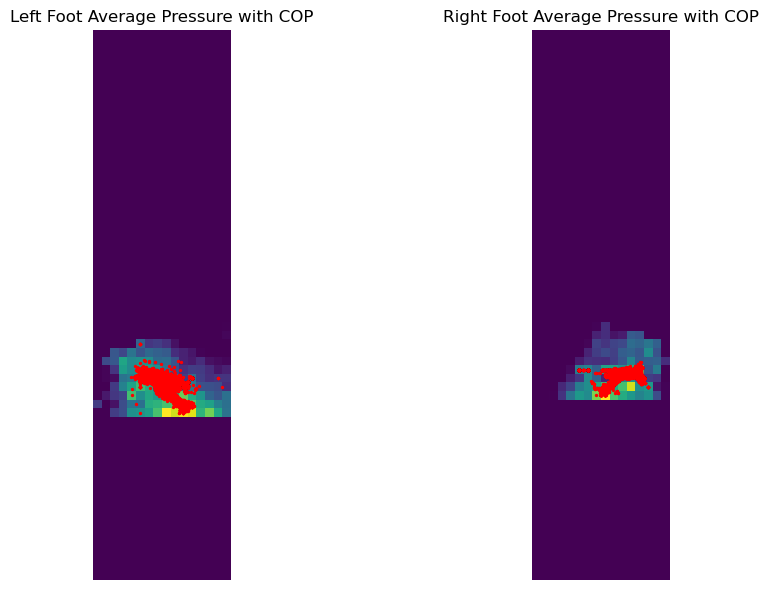

In [11]:
# Center of pressure over time
def compute_center_of_pressure(df):
    """
    For each unique timestamp, compute the center of pressure as:
        COP_x = sum(col * pressure) / sum(pressure)
        COP_y = sum(row * pressure) / sum(pressure)
    Returns a DataFrame with columns: ['timestamp', 'cop_x', 'cop_y'].
    """
    cop_list = []
    for t, group in df.groupby('timestamp'):
        total_pressure = group['pressure'].sum()
        if total_pressure == 0:
            continue  # Avoid division by zero if total pressure is zero.
        cop_x = (group['col'] * group['pressure']).sum() / total_pressure
        cop_y = (group['row'] * group['pressure']).sum() / total_pressure
        cop_list.append({'timestamp': t, 'cop_x': cop_x, 'cop_y': cop_y})
    return pd.DataFrame(cop_list)

cop_left = compute_center_of_pressure(df_left)
cop_right = compute_center_of_pressure(df_right)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(img_avg_left, cmap='viridis', origin='upper')
axs[0].scatter(cop_left['cop_x'], cop_left['cop_y'], color='red', s=2)
axs[0].set_title("Left Foot Average Pressure with COP")
axs[0].axis('off')

axs[1].imshow(img_avg_right, cmap='viridis', origin='upper')
axs[1].scatter(cop_right['cop_x'], cop_right['cop_y'], color='red', s=2)
axs[1].set_title("Right Foot Average Pressure with COP")
axs[1].axis('off')

plt.tight_layout()
plt.show()

Standard Deviations:
Left Foot:  COP_x = 1.136, COP_y = 0.936
Right Foot: COP_x = 1.921, COP_y = 0.658

Levene's Test for Equality of Variances:
COP_x: statistic = 832.502, p-value = 1.97e-178
COP_y: statistic = 447.258, p-value = 6.53e-98


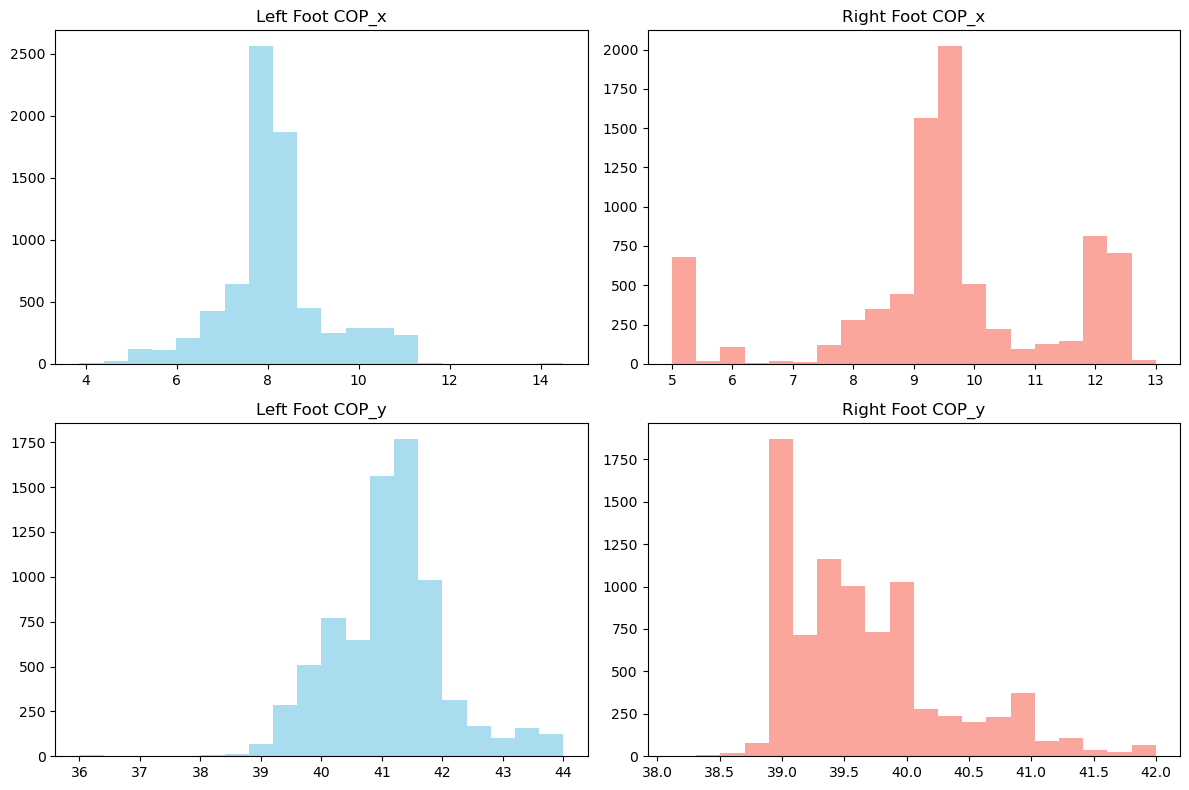

In [12]:
# Compute standard deviations for each foot:
std_left_x = cop_left['cop_x'].std(ddof=1)
std_left_y = cop_left['cop_y'].std(ddof=1)
std_right_x = cop_right['cop_x'].std(ddof=1)
std_right_y = cop_right['cop_y'].std(ddof=1)

print("Standard Deviations:")
print(f"Left Foot:  COP_x = {std_left_x:.3f}, COP_y = {std_left_y:.3f}")
print(f"Right Foot: COP_x = {std_right_x:.3f}, COP_y = {std_right_y:.3f}")

# Now, test if the variances (i.e. the square of the standard deviations) differ significantly.

# Option 1: Levene's Test (robust to non-normality)
lev_stat_x, lev_p_x = levene(cop_left['cop_x'], cop_right['cop_x'])
lev_stat_y, lev_p_y = levene(cop_left['cop_y'], cop_right['cop_y'])

print("\nLevene's Test for Equality of Variances:")
print(f"COP_x: statistic = {lev_stat_x:.3f}, p-value = {lev_p_x:.2e}")
print(f"COP_y: statistic = {lev_stat_y:.3f}, p-value = {lev_p_y:.2e}")

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs[0, 0].hist(cop_left['cop_x'], bins=20, color='skyblue', alpha=0.7)
axs[0, 0].set_title("Left Foot COP_x")
axs[0, 1].hist(cop_right['cop_x'], bins=20, color='salmon', alpha=0.7)
axs[0, 1].set_title("Right Foot COP_x")
axs[1, 0].hist(cop_left['cop_y'], bins=20, color='skyblue', alpha=0.7)
axs[1, 0].set_title("Left Foot COP_y")
axs[1, 1].hist(cop_right['cop_y'], bins=20, color='salmon', alpha=0.7)
axs[1, 1].set_title("Right Foot COP_y")
plt.tight_layout()
plt.show()